
Main notebook contains contributions from all members and is currently being reviewed for conformity.
Some order has been changed to ensure variables are set and core code is isolated outside of 
each person's contribution.

In [3]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

In [4]:
measles_raw_data = pd.read_csv("measles - measles.csv")
measles_raw_data.head()
measles_raw_data.groupby("year").count()

,index,state,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
year,,,,,,,,,,,,,,,
2017,1939,1939,1939,0,1939,0,0,1939,1939,1939,0,0,0,1939,1939
2017-18,10418,10418,10418,7183,6060,10390,0,4970,10418,10418,9,1829,2698,10410,10410
2018-19,48075,48075,48075,22308,34573,43788,0,40900,48075,48075,84,17723,4483,46539,46539


In [5]:
measles_clean = measles_raw_data.drop(columns=["xper", "xmed", "xrel", "district", "year", "county", "enroll"])
# measles_clean = measles_clean.dropna()

measles_clean.dtypes

index        int64
state       object
name        object
type        object
city        object
mmr        float64
overall    float64
lat        float64
lng        float64
dtype: object

In [6]:
# neg_count = measles_clean.loc[["mmr" == "-1"]]
# len(neg_count)

measles_clean['mmr'].value_counts()
measles_clean['overall'].value_counts()

-1.000000      27224
 98.000000      5191
 100.000000     3619
 95.000000      3051
 99.000000      1764
               ...  
 90.140845         1
 96.020000         1
 43.640000         1
 98.098859         1
 90.052356         1
Name: overall, Length: 2691, dtype: int64

In [7]:
# Dealing with the NaN's
measles_clean["type"].fillna("Other", inplace = True)

In [8]:
# Remove -1 values
measles_clean = measles_clean.loc[measles_clean["mmr"] >= 0]
measles_clean = measles_clean.loc[measles_clean["overall"] >= 0]
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,Other,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,Other,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,Other,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,Other,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [9]:
type_groups = measles_clean.groupby("type")
type_groups.count()

,index,state,name,city,mmr,overall,lat,lng
type,,,,,,,,
Kindergarten,1484,1484,1484,0,1484,1484,1484,1484
Other,3122,3122,3122,1978,3122,3122,3121,3121
Private,2258,2258,2258,2237,2258,2258,2207,2207
Public,14904,14904,14904,14904,14904,14904,14895,14895


In [10]:
# Terra's code begins here

In [11]:
# Make series to create pie chart
school_type = measles_clean.groupby('type')

count_school_type = school_type['type'].count()
count_school_type

type
Kindergarten     1484
Other            3122
Private          2258
Public          14904
Name: type, dtype: int64

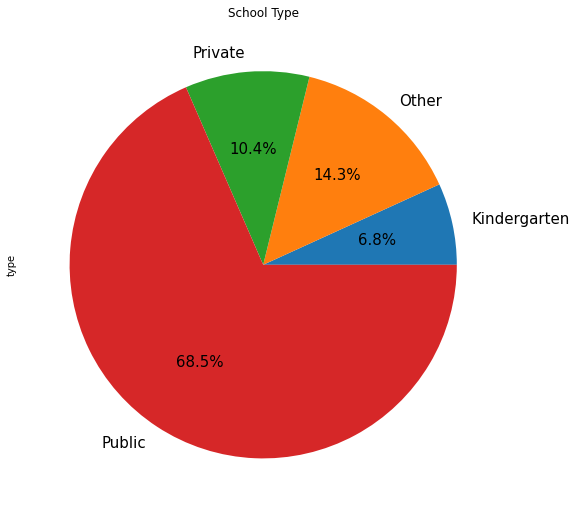

In [12]:
# Fix error - Terra 
# No error after prior code order was corrected.  "Other" category had not been set.
school_type_pie = count_school_type.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=15, autopct='%0.1f%%', \
                                         labels=['Kindergarten', 'Other', 'Private', 'Public'], title=['School Type']) 
# school_type_pie.set_ylabel("Types of Schools")
# plt.axis('equal') 
# plt.title('Type of School')

# plt.show()                           
plt.tight_layout()
plt.savefig('pie_by_type.png')
# type_vals = type_count['type']
# type_labels = type_count['index']

In [13]:
# State list correct after prior code conformed and corrected
state_percents = measles_clean.groupby('state')

count_state_percents = state_percents['type'].count()
count_state_percents

state
California    14224
Colorado       1505
Ohio           2917
Oregon          806
Vermont         338
Washington     1978
Name: type, dtype: int64

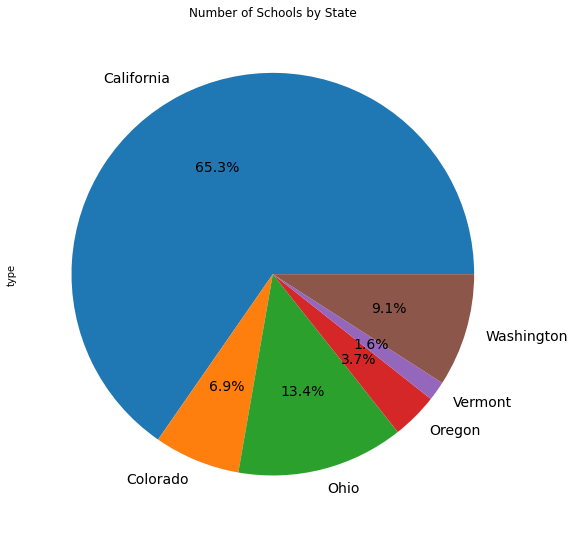

In [14]:
school_type_pie = count_state_percents.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=14, autopct='%0.1f%%', \
                                         labels=['California', 'Colorado', 'Ohio', 'Oregon', 'Vermont', 'Washington'], \
                                         title=['Number of Schools by State']) 

# texts[0].set_fonsize(4)
# plt.show()                           
plt.tight_layout()
plt.savefig('pie_by_state.png')

In [15]:
# Terra's code ends above
# Fukhrudin's code starts below

## SCATTER PLOT: LATITUDE vs LONGITUDE

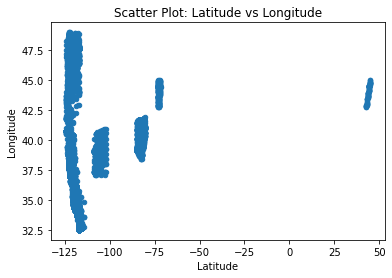

In [16]:
df1 = pd.DataFrame(measles_clean, columns=["lat", "lng"])
df1.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s1.png')

Points on the extreme right are erroneous and must be dropped from the table. The easternmost point in the contiguous US is West Quoddy Head Lighthouse (Maine) with the coordinates (44.81756628922163, -66.95132155560584) so we can't have any longitude value greater than - 66.95132155560584.

In [17]:
# Keeping only negative longitudes
measles_clean_lng = measles_clean[measles_clean['lng'] < 0]

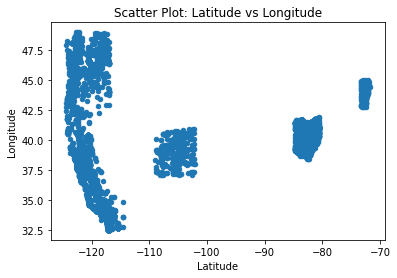

In [18]:
# Re-drawing the scatter
df2 = pd.DataFrame(measles_clean_lng, columns=["lat", "lng"])
df2.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s2.png')

In [19]:
#New column for coloring states
measles_clean_lng['state2'] = measles_clean_lng['state']

In [20]:
# Assigning numerical values to state names for coloring
measles_clean_lng.loc[measles_clean_lng['state'] == 'California', 'state2'] = 1
measles_clean_lng.loc[measles_clean_lng['state'] == 'Colorado', 'state2'] = 2
measles_clean_lng.loc[measles_clean_lng['state'] == 'Ohio', 'state2'] = 3
measles_clean_lng.loc[measles_clean_lng['state'] == 'Oregon', 'state2'] = 4
measles_clean_lng.loc[measles_clean_lng['state'] == 'Washington', 'state2'] = 5
measles_clean_lng.loc[measles_clean_lng['state'] == 'Vermont', 'state2'] = 6

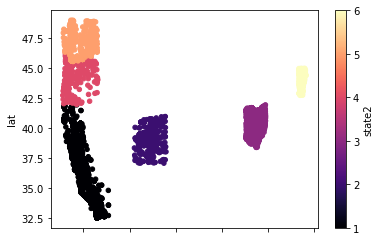

In [21]:
# Colored scatte rplot
dfScat = measles_clean_lng[['lng','lat', 'state2']]
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='inferno')
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='plasma')
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='viridis')
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='magma')

In [22]:
# Melissa's code starts here

In [23]:
# Set up Public, Private, Kindergarten, and Other dataframes

public_stats = measles_clean.loc[measles_clean["type"] == "Public"]
# public_stats

private_stats = measles_clean.loc[measles_clean["type"] == "Private"]
# private_stats

kindergarten_stats = measles_clean.loc[measles_clean["type"] == "Kindergarten"]
# kindergarten_stats

other_stats = measles_clean.loc[measles_clean["type"] == "Other"]
# other_stats

In [24]:
# Loop through the data frame to calculate stats by state

# Set up empty lists to fill in for loop
states = measles_clean["state"].unique()
# states
count_states = []
mean_mmr = []
median_mmr = []
public_mean = []
public_median = []
private_mean = []
private_median = []
kind_mean = []
kind_median = []
other_mean = []
other_median = []

for state in states:
    
    # Identify what state to work with
    state_active = measles_clean.loc[measles_clean["state"] == state]
    
    # Count all the schools for each state
    count_active = state_active["state"].count()
    count_states.append(count_active)
    
    # Calculate mean for each state
    mean_active = state_active["mmr"].mean()
    mean_mmr.append(mean_active)
    
    # Calculate median for each state
    median_active = state_active["mmr"].median()
    median_mmr.append(median_active)
    
    # Reset state_active for use on public subsets
    state_active = public_stats.loc[public_stats["state"] == state]
    
    # Calculate mean for public schools
    public_active = state_active["mmr"].mean()
    public_mean.append(public_active)
    
    # Calculate median for public schools
    public_active = state_active["mmr"].median()
    public_median.append(public_active)
    
    # Reset state_active for use on private subsets
    state_active = private_stats.loc[private_stats["state"] == state]
    
    # Calculate mean for private schools
    private_active = state_active["mmr"].mean()
    private_mean.append(private_active)
    
    # Calculate median for private schools
    private_active = state_active["mmr"].median()
    private_median.append(private_active)
    
    # Reset state_active for use on kindergarten subsets
    state_active = kindergarten_stats.loc[kindergarten_stats["state"] == state]
    
    # Calculate mean for kindergarten schools
    kind_active = state_active["mmr"].mean()
    kind_mean.append(kind_active)
    
    # Calculate median for kindergarten schools
    kind_active = state_active["mmr"].median()
    kind_median.append(kind_active)
    
    # Reset state_active for use on other subsets
    state_active = other_stats.loc[other_stats["state"] == state]
    
    # Calculate mean for Other schools
    other_active = state_active["mmr"].mean()
    other_mean.append(other_active)
    
    # Calculate median for Other schools
    other_active = state_active["mmr"].median()
    other_median.append(other_active)
   
       
# other_median

In [25]:
# Set up summary table of averages per state
avg_by_state = pd.DataFrame({
    "State": states
})

avg_by_state["Count of Schools"] = count_states
avg_by_state["Overall Mean"] = mean_mmr
avg_by_state["Overall Median"] = median_mmr
avg_by_state["Public Mean"] = public_mean
avg_by_state["Public Median"] = public_median
avg_by_state["Private Mean"] = private_mean
avg_by_state["Private Median"] = private_median
avg_by_state["Kindergarten Mean"] = kind_mean
avg_by_state["Kindergarten Median"] = kind_median
avg_by_state["Other Mean"] = other_mean
avg_by_state["Other Median"] = other_median

avg_by_state

# Investigate NaNs
# Indicate a lack of that school type reporting out of that state

,State,Count of Schools,Overall Mean,Overall Median,Public Mean,Public Median,Private Mean,Private Median,Kindergarten Mean,Kindergarten Median,Other Mean,Other Median
0,California,14224,96.371836,98.000000,96.644004,98.00,93.874821,95.0,NaN,NaN,NaN,NaN
1,Colorado,1505,94.210904,97.800000,NaN,NaN,95.121905,100.0,94.198012,97.8,NaN,NaN
2,Ohio,2917,91.463692,94.870000,91.284485,94.74,91.907545,95.0,NaN,NaN,NaN,NaN
3,Oregon,806,94.081152,95.677233,NaN,NaN,NaN,NaN,NaN,NaN,94.081152,95.677233
4,Vermont,338,94.583320,97.222222,NaN,NaN,NaN,NaN,NaN,NaN,94.583320,97.222222
5,Washington,1978,89.336830,92.125000,NaN,NaN,NaN,NaN,NaN,NaN,89.336830,92.125000


By setting up this summary table, we can see which states provided data for which types of schools.  This allows us to have an informed way of breaking the data apart and compare like to like data, such as California and Ohio, or Oregon, Vermon, and Washington.

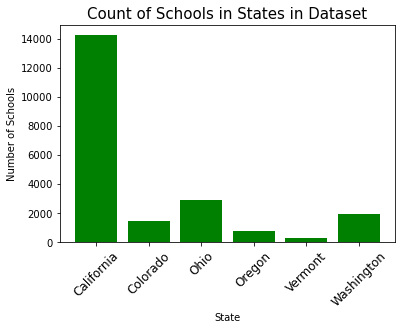

In [26]:
# Plot of school counts across states

y_axis = count_states
x_axis = np.arange(len(states))

plt.bar(x_axis, y_axis, color="green")
plt.ylabel("Number of Schools")
plt.xlabel("State")
plt.title("Count of Schools in States in Dataset", fontsize=15)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()
# Look at California alone

Looking at the count of schools across the states allows us to know if our sample sizes in each state are comparable.  While based on sheer numbers, this chart shows they are not, what we do not know is whether the proportion of schools that reported data out of the entire population is similar across states.  Either way, it is clear from the start difference in the count of schools from California that that state is worth looking at on its own as well.

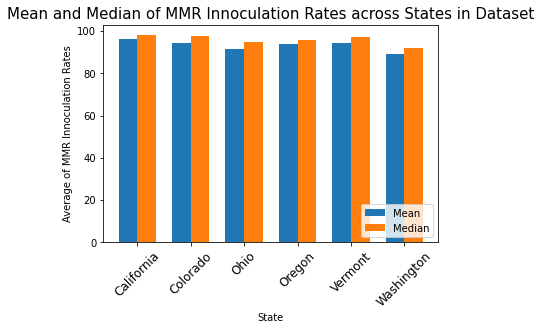

In [27]:
# Plot with grouped bars -- MEAN AND MEDIAN BY STATE
# https://matplotlib.org/3.3.4/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# Add rates to bars, if possible

x = np.arange(len(states))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_mmr, width, label="Mean")
rects2 = ax.bar(x + width/2, median_mmr, width, label="Median")

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates across States in Dataset", fontsize=15)
plt.legend(loc="lower right")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

By displaying the mean and median vaccination rates together, we can see not only how each rate differs across states but how consistently the mean is lower than the median rate for each state.  What this tells us is that there may be lower reported rates of vaccination at a sufficient number of schools in each state to pull the mean rate down.  Looking at the median as well is a reminder that that the actual reported rates may be higher than the mean only would lead a person to infer.  Because this difference holds true across states, it feels like an important trend to hold in mind when using either form of average. This also turned out to be one of our first flags of the presence of outliers impacting our data.

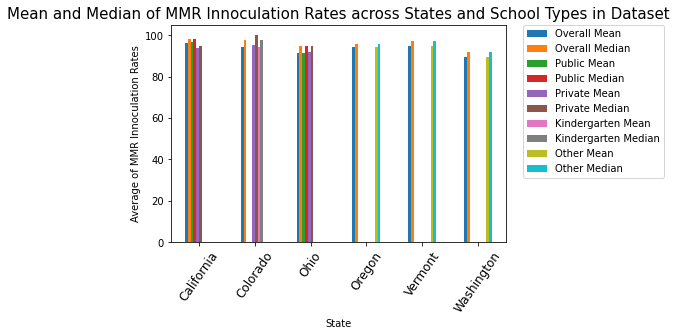

In [38]:
# Grouped bar chart of all averages across all states and school types
# Formatting is being disagreable

group_by_state = avg_by_state.drop(["Count of Schools"], axis=1)

state_group_fig = group_by_state.plot.bar(rot=45)

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates across States and School Types in Dataset", fontsize=15)
# plt.legend(loc="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="55", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

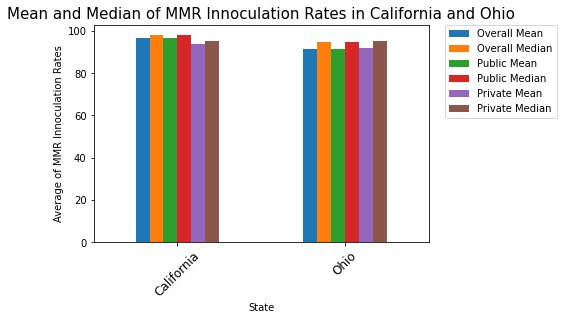

In [29]:
# Alternate California Ohio Grouped Plot
# This might be better/more useful if the ticks were the school type and each had 

california_ohio = avg_by_state.loc[avg_by_state["Public Mean"] >= 0]
california_ohio = california_ohio.drop(columns=["Count of Schools", 
                                                "Kindergarten Mean", "Kindergarten Median",
                                                "Other Mean", "Other Median"])
cal_oh_labels = california_ohio["State"]
california_group_fig = california_ohio.plot.bar(rot=45)
x_axis = np.arange(len(cal_oh_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates in California and Ohio", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cal_oh_labels, rotation="45", fontsize=12)

plt.show()

In [30]:
california_ohio = california_ohio.reset_index(drop=True)
california_ohio = california_ohio.drop(columns=["State"])
ohio_cali = california_ohio.T
# ohio_cali.rename(columns={0: "California", 2: "Ohio"})
ohio_cali

,0,1
Overall Mean,96.371836,91.463692
Overall Median,98.000000,94.870000
Public Mean,96.644004,91.284485
Public Median,98.000000,94.740000
Private Mean,93.874821,91.907545
Private Median,95.000000,95.000000


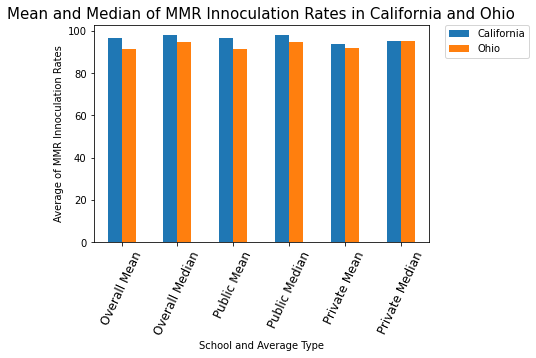

In [37]:
ohio_cali
oh_cal_labels = ohio_cali.index
oh_cal_group_fig = ohio_cali.plot.bar(rot=45)
x_axis = np.arange(len(oh_cal_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean and Median of MMR Innoculation Rates in California and Ohio", fontsize=15)
legend_text=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Ohio")
# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, oh_cal_labels, rotation="65", fontsize=12)

plt.show()

In [32]:
# Testing Average by type
avg_by_type = avg_by_state.drop(columns=["Count of Schools"])
avg_by_type = avg_by_type.drop(columns=["State"])
avg_by_type = avg_by_type.T
avg_by_type

,0,1,2,3,4,5
Overall Mean,96.371836,94.210904,91.463692,94.081152,94.583320,89.33683
Overall Median,98.000000,97.800000,94.870000,95.677233,97.222222,92.12500
Public Mean,96.644004,NaN,91.284485,NaN,NaN,NaN
Public Median,98.000000,NaN,94.740000,NaN,NaN,NaN
Private Mean,93.874821,95.121905,91.907545,NaN,NaN,NaN
Private Median,95.000000,100.000000,95.000000,NaN,NaN,NaN
Kindergarten Mean,NaN,94.198012,NaN,NaN,NaN,NaN
Kindergarten Median,NaN,97.800000,NaN,NaN,NaN,NaN
Other Mean,NaN,NaN,NaN,94.081152,94.583320,89.33683
Other Median,NaN,NaN,NaN,95.677233,97.222222,92.12500


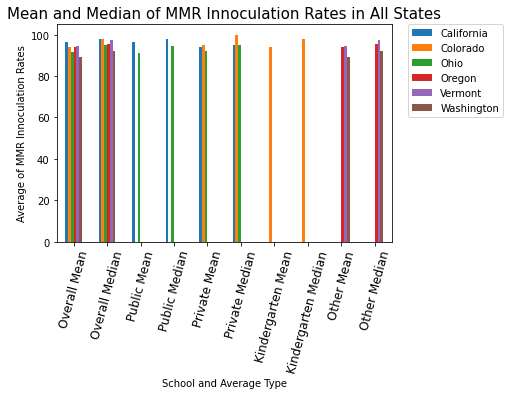

In [36]:
# Chart of Mean and Medians grouped together

avg_by_type
type_labels = avg_by_type.index
type_group_fig = avg_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean and Median of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="75", fontsize=12)

plt.show()

In [34]:
print(states)
avg_by_state
mean_by_type = avg_by_state.drop(columns=["Count of Schools", "State", 
                                          "Overall Median", "Public Median", "Private Median",
                                          "Kindergarten Median", "Other Median"])
mean_by_type = mean_by_type.T
mean_by_type

median_by_type = avg_by_state.drop(columns=["Count of Schools", "State", 
                                          "Overall Mean", "Public Mean", "Private Mean", 
                                          "Kindergarten Mean", "Other Mean"])
median_by_type = median_by_type.T
median_by_type

['California' 'Colorado' 'Ohio' 'Oregon' 'Vermont' 'Washington']


,0,1,2,3,4,5
Overall Median,98.0,97.8,94.87,95.677233,97.222222,92.125
Public Median,98.0,NaN,94.74,NaN,NaN,NaN
Private Median,95.0,100.0,95.00,NaN,NaN,NaN
Kindergarten Median,NaN,97.8,NaN,NaN,NaN,NaN
Other Median,NaN,NaN,NaN,95.677233,97.222222,92.125


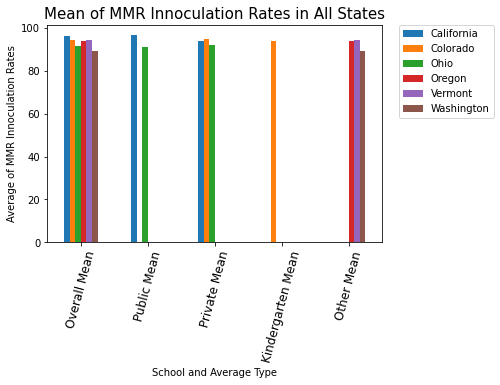

In [35]:
# Chart of Mean by type

mean_by_type
type_labels = mean_by_type.index
type_group_fig = mean_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="75", fontsize=12)

plt.show()

In [2]:
# Chart for Median only

median_by_type
type_labels = median_by_type.index
type_group_fig = median_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Median of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="70", fontsize=12)


plt.show()

NameError: name 'median_by_type' is not defined

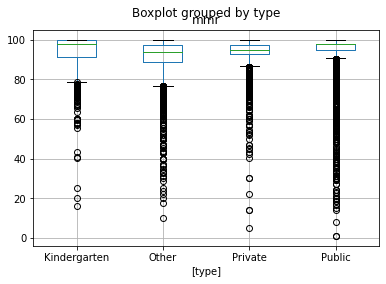

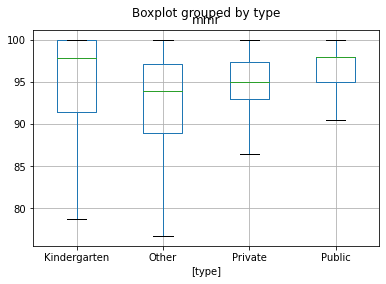

In [71]:
# Boxplots by Fukhrudin
# Boxplot of school types
# Looks like this is not Fukhrudin's code. Shoot.
type_boxplot = measles_clean_lng[['mmr','type']]
type_boxplot.boxplot(by='type')

# Boxplot of school types
type_boxplot = measles_clean_lng[['mmr','type']]
type_boxplot.boxplot(by='type', showfliers=True)
type_boxplot.boxplot(by='type', showfliers=False)

In [ ]:
# Melissa's code ends above
# Rylee's code begins here!

In [41]:
# Just doing hypothesis testing right now
# We are trying to prove that mmr rates vary by school type

st.f_oneway(public_stats['mmr'], private_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

F_onewayResult(statistic=392.87029577981065, pvalue=1.527208667718484e-248)

ANOVA test for all school types in every state in clean dataset. NULL hypothesis is that the mean and variance in all school types are the same. The extremely small p-value indicates that these datasets are not alike, disproving the NULL. Further analysis needed to determine if one outlier is effecting the data or if there are differences between all that are significant.

Will repeat test after dropping outliers as well.

In [42]:
# Taking out the "other" school type
st.f_oneway(public_stats['mmr'], private_stats['mmr'], kindergarten_stats['mmr'])

F_onewayResult(statistic=175.7107265384881, pvalue=2.5125465603433475e-76)

ANOVA test removing "Other" school type with the same NULL hypothesis (all types are the same), returns a very small p-value as well.  This value is not as small, indicating that this type had an impact on the p-value for all types together, but the remaining types still significantly different.

In [43]:
# Taking out the "kindergarten" school type
st.f_oneway(public_stats['mmr'], private_stats['mmr'], other_stats['mmr'])

F_onewayResult(statistic=599.0727096444173, pvalue=1.6646963060659216e-253)

ANOVA test removing "Kindergarten" school type with the same NULL hypothesis (all types are the same), returns a very small p-value as well.  This value is even smaller than the overall p-value, indicating that this type had an impact on the p-value for all types together, but the remaining types still significantly different.

In [44]:
# Taking out the "private" school type
st.f_oneway(public_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

F_onewayResult(statistic=538.133386429188, pvalue=3.244387849026671e-228)

ANOVA test removing "Private" school type with the same NULL hypothesis (all types are the same), returns a very small p-value as well.  This value is very similar to the p-value overall, indicating that this type had a small impact on the p-value for all types together, but the remaining types still significantly different.

In [45]:
# Taking out the "public" school type
st.f_oneway(private_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

F_onewayResult(statistic=65.68544003792599, pvalue=5.531556747561414e-29)

ANOVA test removing "Public" school type with the same NULL hypothesis (all types are the same), returns a very small p-value as well.  This value is the largest of the p-values, indicating the other three school types are more similar than any other combination of school types. This tells us that the Public school data differs from the other datasets more.

In [46]:
# Taking out "other" and "public" and running a t-test because this is where the p-vals were the largest
# when I took them out in the ANOVA
st.ttest_ind(private_stats['mmr'], kindergarten_stats['mmr'], equal_var=False)

Ttest_indResult(statistic=-3.6793746863579435, pvalue=0.0002379061203745497)

Comparing Private and Kindergarten datasets with a Two Sample T-Test with the NULL hypothesis that the means of both datasets are the same. With a p-value less than 0.05, we can reject the NULL and conclude that the means are different.

In [47]:
# T-test on "other" and "private"
st.ttest_ind(private_stats['mmr'], other_stats['mmr'], equal_var=False)

Ttest_indResult(statistic=8.149221705421356, pvalue=4.526050894470002e-16)

Comparing Private and Other types with a Two Sample T-Test with the NULL hypothesis that the means of both datasets are the same. With a p-value less than 0.05, we can reject the NULL and conclude that the means are different.

In [48]:
# T-test on "other" and "kindergarten"
st.ttest_ind(other_stats['mmr'], kindergarten_stats['mmr'], equal_var=False)

Ttest_indResult(statistic=-10.59068780230639, pvalue=8.414602855892066e-26)

Comparing Other and Kindergarten with the NULL hypothesis that the means of both datasets are the same. With a p-value less than 0.05, we can reject the NULL and conclude that the means are different.

In [49]:
# T-test on "public" and "private"
st.ttest_ind(private_stats['mmr'], public_stats['mmr'], equal_var=False)

Ttest_indResult(statistic=-15.323827482829813, pvalue=6.555688834799406e-51)

Comparing Public and Private with the NULL hypothesis that the means of both datasets are the same. With a p-value less than 0.05, we can reject the NULL and conclude that the means are different.

In [50]:
# T-test on "public" and "other"
st.ttest_ind(other_stats['mmr'], public_stats['mmr'], equal_var=False)

Ttest_indResult(statistic=-25.247589916731105, pvalue=6.735876076356765e-130)

Comparing Public and Other with the NULL hypothesis that the means of both datasets are the same. With a p-value less than 0.05, we can reject the NULL and conclude that the means are different.

In [51]:
# Other pairings as determined

In [52]:
# Rylee's code ends here!